In [55]:
#!/usr/bin/python
import nltk
import numpy as np
import re
import tensorflow as tf
from nltk.tokenize import WordPunctTokenizer
from random import randint
from sklearn.model_selection import train_test_split
import random

Importing Glove and  40000 words list 

In [56]:
wordsList = np.load('wordsList.npy')
print('Loaded the word list!')
wordsList = wordsList.tolist() #Originally loaded as numpy array
wordsList = [word.decode('UTF-8') for word in wordsList] #Encode words as UTF-8
wordVectors = np.load('wordVectors.npy')
print ('Loaded the word vectors!')
print(len(wordsList))

Loaded the word list!
Loaded the word vectors!
400000


Importing the Dataset Hp: 1 ** Sad:2 ** Anger:3 ** Disgust:4 ** Sur:5 ** Fear:6}

In [57]:
#--------------------Extracting Emotion && sentences from corpus
def extract(dataset):
    f = open(dataset, 'r+')
    linea = f.readline()
    emotion = []
    sentences = []
    disgust = re.compile('^4')
    surprise = re.compile('^5')
    while linea != "":    
        #Ignoresmos sorpresa y disgusto
        if not re.match(disgust, linea) and not re.match(surprise, linea):
            print("** ",linea)
            linea = linea.split("#")
            #Obtaining the emocion
            emotion.append(int(linea[0]))
            sentences.append(linea[1])
        linea = f.readline()
    f.close()
    return sentences,emotion

dataset = "Heterogenious_Dataset/dataset.txt"
sentences,emotion = extract(dataset)
print(emotion[0]," ",sentences[0])
print("Labels: ",len(emotion), "Sentences: ",len(sentences))

**  2#Mortar assault leaves at least 18 dead

**  1#Goal delight for Sheva

**  1#Nigeria hostage feared dead is freed

**  6#Bombers kill shoppers

**  1#PM: Havana deal a good experiment

**  1#Kate is marrying Doherty

**  1#Happy birthday, iPod

**  1#Alonso would be happy to retire with three titles

**  1#Madonna's New Tot 'Happy at Home' in London

**  2#Nicole Kidman asks dad to help stop husband's drinking

**  1#United Finds Good Connection in Win

**  2#We were 'arrogant and stupid' over Iraq, says US diplomat

**  3#Bad reasons to be good

**  1#Madonna's new baby's daddy didn't realize adoption was `for good'

**  2#Women in their 60s 'are perfectly good mothers'

**  1#We're a pretty kind 'bully'

**  2#Moderate drinking reduces men's heart attack risk

**  1#Tom Cruise and Katie Holmes set wedding date

**  6#Kidnapped AP photographer freed in Gaza

**  1#Bush Insists Troops Stay in Iraq, Predicts Midterm Victory

**  3#UK announces immigration restrictions

**  1#Three 

**  1#I'm in Buena Vista at these hot springs and it should be awesome but I didn't sleep one little bit last night.

**  2#I think the pain and awkwardness of attending your reception is worth seeing your face again.

**  2#I miss you so much.

**  2#I've never missed anyone so much as you.

**  2#I'm sitting here in this lobby thing and crying and it's very embarassing but I can't help it because I just want you and me to run away and I want you to hold me for one whole night and rock me to sleep.

**  2#I miss you.

**  1#Well Im finishing up my first week at Jubans, its really awesome.

**  1#We get drinks after work too and the food I can eat is awesome.

**  6#Oh well its nothing too too bad but its making me nervous.

**  6#Truly horrifying footage of a Disney character orgy backstage at one of their shows."

**  1#Well, not so much an orgy, but really rather amusing!

**  1#Another slight parallel I find amusing: Jason played Heracles in Alcestes last year, just as I am playing


**  2#Aunt Pettitoes wiped her eyes with a large pocket handkerchief, then she wiped Pigling Bland's nose and shed tears; then she wiped Alexander's nose and shed tears; then she passed the handkerchief to Spot.

**  2#Aunt Pettitoes sighed and grunted, and addressed those little pigs as follows--

**  2#Pigling Bland who was a sedate little pig, looked solemnly at his mother, a tear trickled down his cheek.

**  1#Alexander went into squeals of laughter.

**  3#Pigling Bland reproved Alexander.

**  1#But presently they made it up again, and trotted away together, singing--

**  6#Pigling Bland became frightened and cried "Wee, wee, wee!

**  6#I can't find my way home!"

**  2#He saw a small wooden hut, made his way to it, and crept inside --"I am afraid it IS a hen house, but what can I do?" said Pigling Bland, wet and cold and quite tired out.

**  3#"Trap, trap, trap! cackle, cackle, cackle!" scolded the disturbed cockerel.

**  6#Pigling Bland, much alarmed, determined to leave 

In [58]:
print(emotion[0])

2


Cuánto hay de cada emoción

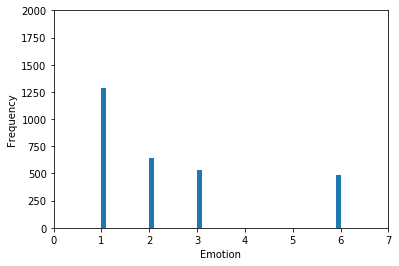

In [59]:
import matplotlib.pyplot as plt
import collections
%matplotlib inline
def histograma(emotion):
    #print(emotion)
    plt.hist(emotion, 50)
    plt.xlabel('Emotion')
    plt.ylabel('Frequency')
    plt.axis([0, 7, 0, 2000])
    plt.show()
histograma(emotion)

Preprocesing of Sentences

In [60]:
def decontracted(phrase):
    # specific
    '''phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)'''

    if phrase == "t":
        phrase = "not"
    elif phrase == "re":
        phrase = "are"
    elif phrase == "s":
        phrase = "is"
    elif phrase == "d":
        phrase = "would"
    elif phrase == "ve":
        phrase = "have"
    elif phrase == "m":
        phrase = "am"
    elif phrase == "ca":
        phrase = "can"
    elif phrase == "isn":
        phrase = "is"
    elif phrase == "aren":
        phrase = "are"
    elif phrase == "wouldn":
        phrase = "would"

    # general
    '''phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)'''
    return phrase

In [61]:
#----------------Cleanning Sentences--------------
def cleaner(sent):
    for s in range(0,len(sent)):
        print(sent[s])
        sent[s] = sent[s].lower()
        sent[s] = WordPunctTokenizer().tokenize(sent[s])#nltk.word_tokenize(sent[s])
        #print(sent[s])
        for word in range(0,len(sent[s])):
            sent[s][word] = decontracted(sent[s][word])
            sent[s][word] = re.sub(r'[^a-zA-Z0-9\s]', ' ', sent[s][word])
            sent[s][word] = sent[s][word].strip()
            
        sent[s] = list(filter(None, sent[s])) # fastest
        print(sent[s])
        print("-----------")
    return sent

c_sent = sentences[:]    
c_sent = cleaner(c_sent)
print(c_sent[0])

Mortar assault leaves at least 18 dead

['mortar', 'assault', 'leaves', 'at', 'least', '18', 'dead']
-----------
Goal delight for Sheva

['goal', 'delight', 'for', 'sheva']
-----------
Nigeria hostage feared dead is freed

['nigeria', 'hostage', 'feared', 'dead', 'is', 'freed']
-----------
Bombers kill shoppers

['bombers', 'kill', 'shoppers']
-----------
PM: Havana deal a good experiment

['pm', 'havana', 'deal', 'a', 'good', 'experiment']
-----------
Kate is marrying Doherty

['kate', 'is', 'marrying', 'doherty']
-----------
Happy birthday, iPod

['happy', 'birthday', 'ipod']
-----------
Alonso would be happy to retire with three titles

['alonso', 'would', 'be', 'happy', 'to', 'retire', 'with', 'three', 'titles']
-----------
Madonna's New Tot 'Happy at Home' in London

['madonna', 'is', 'new', 'tot', 'happy', 'at', 'home', 'in', 'london']
-----------
Nicole Kidman asks dad to help stop husband's drinking

['nicole', 'kidman', 'asks', 'dad', 'to', 'help', 'stop', 'husband', 'is', 'dr


['wii', 'news', 'for', 'gamers']
-----------
Two Koreas to resume talks

['two', 'koreas', 'to', 'resume', 'talks']
-----------
England opt for Bopara over Loye

['england', 'opt', 'for', 'bopara', 'over', 'loye']
-----------
Create own 'Thrillville' for a wild ride

['create', 'own', 'thrillville', 'for', 'a', 'wild', 'ride']
-----------
Dolphins, sea lions may report for duty soon

['dolphins', 'sea', 'lions', 'may', 'report', 'for', 'duty', 'soon']
-----------
Nasdaq-LSE battle nears deadline

['nasdaq', 'lse', 'battle', 'nears', 'deadline']
-----------
A personal plea for HPV vaccine plan

['a', 'personal', 'plea', 'for', 'hpv', 'vaccine', 'plan']
-----------
U.S. opens door for Iraqi refugees

['u', 'is', 'opens', 'door', 'for', 'iraqi', 'refugees']
-----------
Swiss plane crashes at Moscow airport

['swiss', 'plane', 'crashes', 'at', 'moscow', 'airport']
-----------
Study: napping might help heart

['study', 'napping', 'might', 'help', 'heart']
-----------
MySpace sales surging


-----------
We're still together- and we still have the opportunity to make things right - - - but I'm a very patient person- and it's been close to 5 years now- and my patience is wearing thin.

['we', 'are', 'still', 'together', 'and', 'we', 'still', 'have', 'the', 'opportunity', 'to', 'make', 'things', 'right', 'but', 'i', 'am', 'a', 'very', 'patient', 'person', 'and', 'it', 'is', 'been', 'close', 'to', '5', 'years', 'now', 'and', 'my', 'patience', 'is', 'wearing', 'thin']
-----------
Yes, we are having a small celebration today.

['yes', 'we', 'are', 'having', 'a', 'small', 'celebration', 'today']
-----------
I am always so happy after talking to him!

['i', 'am', 'always', 'so', 'happy', 'after', 'talking', 'to', 'him']
-----------
And every sigle one of them are furious.

['and', 'every', 'sigle', 'one', 'of', 'them', 'are', 'furious']
-----------
Wayne says that the tension is unreal.

['wayne', 'says', 'that', 'the', 'tension', 'is', 'unreal']
-----------
I told her that she be

['i', 'am', 'kind', 'of', 'freaking', 'out', 'about', 'debate', 'but', 'i', 'am', 'kind', 'of', 'okay']
-----------
Good news.

['good', 'news']
-----------
I was psyched.

['i', 'was', 'psyched']
-----------
At one point I apologized for being so nervous and they told me that there were people a lot worse and that I wasn't using the words "uh" and "um" as often as others had been.

['at', 'one', 'point', 'i', 'apologized', 'for', 'being', 'so', 'nervous', 'and', 'they', 'told', 'me', 'that', 'there', 'were', 'people', 'a', 'lot', 'worse', 'and', 'that', 'i', 'wasn', 'not', 'using', 'the', 'words', 'uh', 'and', 'um', 'as', 'often', 'as', 'others', 'had', 'been']
-----------
Everything looks good.

['everything', 'looks', 'good']
-----------
Where they will decide to place me is up to them, as long as I get the job, I'll be really happy.

['where', 'they', 'will', 'decide', 'to', 'place', 'me', 'is', 'up', 'to', 'them', 'as', 'long', 'as', 'i', 'get', 'the', 'job', 'i', 'll', 'be', 'rea

The miller thought to himself: "The wolf wants to deceive someone," and refused; but the wolf said: "If you will not do it, I will devour you."

['the', 'miller', 'thought', 'to', 'himself', 'the', 'wolf', 'wants', 'to', 'deceive', 'someone', 'and', 'refused', 'but', 'the', 'wolf', 'said', 'if', 'you', 'will', 'not', 'do', 'it', 'i', 'will', 'devour', 'you']
-----------
Then the miller was afraid, and made his paws white for him.

['then', 'the', 'miller', 'was', 'afraid', 'and', 'made', 'his', 'paws', 'white', 'for', 'him']
-----------
They were terrified and wanted to hide themselves.

['they', 'were', 'terrified', 'and', 'wanted', 'to', 'hide', 'themselves']
-----------
Then you may imagine how she wept over her poor children.

['then', 'you', 'may', 'imagine', 'how', 'she', 'wept', 'over', 'her', 'poor', 'children']
-----------
At length in her grief she went out, and the youngest kid ran with her.

['at', 'length', 'in', 'her', 'grief', 'she', 'went', 'out', 'and', 'the', 'younges

Les't determine the total and average number of words in each sentencesLes't determine the total and average number of words in each sentences

In [62]:
def maximum(sent):
    numWords = []
    for s in sent:
        counter = len(s)
        numWords.append(counter) 
    maxLengh = int(sum(numWords)/len(numWords))
    print("Average: ", maxLengh)
    return numWords,maxLengh
numWords,maxSeqLength = maximum(c_sent)

Average:  16


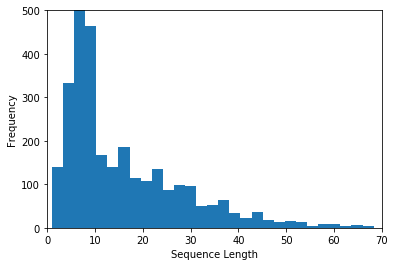

In [63]:
import matplotlib.pyplot as plt
%matplotlib inline
def histograma(numWords):
    plt.hist(numWords, 50)
    plt.xlabel('Sequence Length')
    plt.ylabel('Frequency')
    plt.axis([0, 70, 0, 500])
    plt.show()
histograma(numWords)

Converting each sentence into a vector and adding it into a matrix of 'ids'

In [64]:
def integerSenteces(sent,maximum):
    i = 0
    embbeding = 0
    matrix = np.zeros((len(sent), maximum)) #250 X 6 (numEjem X Maximun)
    for s in sent:
        vector = np.zeros((maximum), dtype='int32')
        bound = maximum
        if len(s) < maximum:
            bound = len(s)    

        for token in range(0,bound): #No encuentra macu, porque la corta
            if s[token] not in wordsList:
                vector[token] = embbeding # ???
                #print(s[token])
            else:
                vector[token] = (wordsList.index(s[token]))
                embbeding = vector[token]
        matrix[i] = (vector)
        i += 1
    return matrix

In [65]:
maxSeqLength = 83 #Para poder probarlo en Twitter RNN
X = integerSenteces(c_sent,maxSeqLength) 
print("Sentences integer representation: ",(X.shape))
print("Sentences: ",len(c_sent))
print("Integer format",X[249])
print("Normal format",c_sent[249])

Sentences integer representation:  (2940, 83)
Sentences:  2940
Integer format [8.0600e+02 3.0100e+02 1.4000e+01 1.1364e+04 2.0482e+04 1.5200e+02
 2.2210e+03 4.4488e+04 6.0000e+00 2.6600e+02 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000

Transformming labels to correct format

In [66]:
def toClasses(emo):
    for e in range(0,len(emo)):
        if emo[e] == 6:
            emo[e] = 4
    return emo
emotion = toClasses(emotion)

Converting the Labels into Onehot Vectors

In [67]:
def toLabels(emo):
    classes = 4 #Se limito a 4 clases
    Y = np.zeros((len(emo), classes)) #Num Ejemplos X 4 emociones
    for e in range(0,len(emo)):
        vector = np.zeros((classes))
        vector[(emo[e] % (classes + 1)) - 1] = 1 
        Y[e] = vector
        print(emo[e],"---",vector)
    return Y
 
Y = toLabels(emotion)

2 --- [0. 1. 0. 0.]
1 --- [1. 0. 0. 0.]
1 --- [1. 0. 0. 0.]
4 --- [0. 0. 0. 1.]
1 --- [1. 0. 0. 0.]
1 --- [1. 0. 0. 0.]
1 --- [1. 0. 0. 0.]
1 --- [1. 0. 0. 0.]
1 --- [1. 0. 0. 0.]
2 --- [0. 1. 0. 0.]
1 --- [1. 0. 0. 0.]
2 --- [0. 1. 0. 0.]
3 --- [0. 0. 1. 0.]
1 --- [1. 0. 0. 0.]
2 --- [0. 1. 0. 0.]
1 --- [1. 0. 0. 0.]
2 --- [0. 1. 0. 0.]
1 --- [1. 0. 0. 0.]
4 --- [0. 0. 0. 1.]
1 --- [1. 0. 0. 0.]
3 --- [0. 0. 1. 0.]
1 --- [1. 0. 0. 0.]
4 --- [0. 0. 0. 1.]
4 --- [0. 0. 0. 1.]
1 --- [1. 0. 0. 0.]
1 --- [1. 0. 0. 0.]
3 --- [0. 0. 1. 0.]
1 --- [1. 0. 0. 0.]
4 --- [0. 0. 0. 1.]
3 --- [0. 0. 1. 0.]
2 --- [0. 1. 0. 0.]
4 --- [0. 0. 0. 1.]
2 --- [0. 1. 0. 0.]
2 --- [0. 1. 0. 0.]
2 --- [0. 1. 0. 0.]
2 --- [0. 1. 0. 0.]
4 --- [0. 0. 0. 1.]
2 --- [0. 1. 0. 0.]
4 --- [0. 0. 0. 1.]
4 --- [0. 0. 0. 1.]
4 --- [0. 0. 0. 1.]
3 --- [0. 0. 1. 0.]
1 --- [1. 0. 0. 0.]
1 --- [1. 0. 0. 0.]
2 --- [0. 1. 0. 0.]
3 --- [0. 0. 1. 0.]
4 --- [0. 0. 0. 1.]
2 --- [0. 1. 0. 0.]
4 --- [0. 0. 0. 1.]
1 --- [1. 0. 0. 0.]


2 --- [0. 1. 0. 0.]
2 --- [0. 1. 0. 0.]
1 --- [1. 0. 0. 0.]
1 --- [1. 0. 0. 0.]
1 --- [1. 0. 0. 0.]
3 --- [0. 0. 1. 0.]
4 --- [0. 0. 0. 1.]
4 --- [0. 0. 0. 1.]
1 --- [1. 0. 0. 0.]
4 --- [0. 0. 0. 1.]
4 --- [0. 0. 0. 1.]
1 --- [1. 0. 0. 0.]
2 --- [0. 1. 0. 0.]
2 --- [0. 1. 0. 0.]
1 --- [1. 0. 0. 0.]
2 --- [0. 1. 0. 0.]
3 --- [0. 0. 1. 0.]
1 --- [1. 0. 0. 0.]
2 --- [0. 1. 0. 0.]
4 --- [0. 0. 0. 1.]
1 --- [1. 0. 0. 0.]
2 --- [0. 1. 0. 0.]
3 --- [0. 0. 1. 0.]
1 --- [1. 0. 0. 0.]
1 --- [1. 0. 0. 0.]
3 --- [0. 0. 1. 0.]
4 --- [0. 0. 0. 1.]
1 --- [1. 0. 0. 0.]
4 --- [0. 0. 0. 1.]
4 --- [0. 0. 0. 1.]
1 --- [1. 0. 0. 0.]
1 --- [1. 0. 0. 0.]
2 --- [0. 1. 0. 0.]
2 --- [0. 1. 0. 0.]
4 --- [0. 0. 0. 1.]
4 --- [0. 0. 0. 1.]
4 --- [0. 0. 0. 1.]
4 --- [0. 0. 0. 1.]
2 --- [0. 1. 0. 0.]
1 --- [1. 0. 0. 0.]
4 --- [0. 0. 0. 1.]
4 --- [0. 0. 0. 1.]
1 --- [1. 0. 0. 0.]
1 --- [1. 0. 0. 0.]
4 --- [0. 0. 0. 1.]
4 --- [0. 0. 0. 1.]
4 --- [0. 0. 0. 1.]
4 --- [0. 0. 0. 1.]
2 --- [0. 1. 0. 0.]
2 --- [0. 1. 0. 0.]


1 --- [1. 0. 0. 0.]
1 --- [1. 0. 0. 0.]
1 --- [1. 0. 0. 0.]
1 --- [1. 0. 0. 0.]
1 --- [1. 0. 0. 0.]
1 --- [1. 0. 0. 0.]
1 --- [1. 0. 0. 0.]
1 --- [1. 0. 0. 0.]
1 --- [1. 0. 0. 0.]
1 --- [1. 0. 0. 0.]
1 --- [1. 0. 0. 0.]
1 --- [1. 0. 0. 0.]
1 --- [1. 0. 0. 0.]
1 --- [1. 0. 0. 0.]
1 --- [1. 0. 0. 0.]
1 --- [1. 0. 0. 0.]
1 --- [1. 0. 0. 0.]
1 --- [1. 0. 0. 0.]
1 --- [1. 0. 0. 0.]
1 --- [1. 0. 0. 0.]
1 --- [1. 0. 0. 0.]
1 --- [1. 0. 0. 0.]
1 --- [1. 0. 0. 0.]
1 --- [1. 0. 0. 0.]
1 --- [1. 0. 0. 0.]
1 --- [1. 0. 0. 0.]
1 --- [1. 0. 0. 0.]
1 --- [1. 0. 0. 0.]
1 --- [1. 0. 0. 0.]
1 --- [1. 0. 0. 0.]
1 --- [1. 0. 0. 0.]
1 --- [1. 0. 0. 0.]
1 --- [1. 0. 0. 0.]
1 --- [1. 0. 0. 0.]
1 --- [1. 0. 0. 0.]
1 --- [1. 0. 0. 0.]
1 --- [1. 0. 0. 0.]
1 --- [1. 0. 0. 0.]
3 --- [0. 0. 1. 0.]
3 --- [0. 0. 1. 0.]
3 --- [0. 0. 1. 0.]
2 --- [0. 1. 0. 0.]
3 --- [0. 0. 1. 0.]
3 --- [0. 0. 1. 0.]
2 --- [0. 1. 0. 0.]
2 --- [0. 1. 0. 0.]
1 --- [1. 0. 0. 0.]
1 --- [1. 0. 0. 0.]
2 --- [0. 1. 0. 0.]
2 --- [0. 1. 0. 0.]


2 --- [0. 1. 0. 0.]
1 --- [1. 0. 0. 0.]
1 --- [1. 0. 0. 0.]
1 --- [1. 0. 0. 0.]
2 --- [0. 1. 0. 0.]
1 --- [1. 0. 0. 0.]
1 --- [1. 0. 0. 0.]
1 --- [1. 0. 0. 0.]
1 --- [1. 0. 0. 0.]
1 --- [1. 0. 0. 0.]
1 --- [1. 0. 0. 0.]
1 --- [1. 0. 0. 0.]
1 --- [1. 0. 0. 0.]
4 --- [0. 0. 0. 1.]
4 --- [0. 0. 0. 1.]
4 --- [0. 0. 0. 1.]
1 --- [1. 0. 0. 0.]
2 --- [0. 1. 0. 0.]
1 --- [1. 0. 0. 0.]
1 --- [1. 0. 0. 0.]
1 --- [1. 0. 0. 0.]
1 --- [1. 0. 0. 0.]
2 --- [0. 1. 0. 0.]
1 --- [1. 0. 0. 0.]
2 --- [0. 1. 0. 0.]
3 --- [0. 0. 1. 0.]
1 --- [1. 0. 0. 0.]
1 --- [1. 0. 0. 0.]
3 --- [0. 0. 1. 0.]
3 --- [0. 0. 1. 0.]
4 --- [0. 0. 0. 1.]
3 --- [0. 0. 1. 0.]
3 --- [0. 0. 1. 0.]
3 --- [0. 0. 1. 0.]
3 --- [0. 0. 1. 0.]
3 --- [0. 0. 1. 0.]
4 --- [0. 0. 0. 1.]
4 --- [0. 0. 0. 1.]
4 --- [0. 0. 0. 1.]
4 --- [0. 0. 0. 1.]
3 --- [0. 0. 1. 0.]
4 --- [0. 0. 0. 1.]
1 --- [1. 0. 0. 0.]
1 --- [1. 0. 0. 0.]
2 --- [0. 1. 0. 0.]
1 --- [1. 0. 0. 0.]
1 --- [1. 0. 0. 0.]
1 --- [1. 0. 0. 0.]
1 --- [1. 0. 0. 0.]
1 --- [1. 0. 0. 0.]


2 --- [0. 1. 0. 0.]
2 --- [0. 1. 0. 0.]
1 --- [1. 0. 0. 0.]
4 --- [0. 0. 0. 1.]
1 --- [1. 0. 0. 0.]
1 --- [1. 0. 0. 0.]
2 --- [0. 1. 0. 0.]
3 --- [0. 0. 1. 0.]
1 --- [1. 0. 0. 0.]
4 --- [0. 0. 0. 1.]
2 --- [0. 1. 0. 0.]
2 --- [0. 1. 0. 0.]
1 --- [1. 0. 0. 0.]
1 --- [1. 0. 0. 0.]
1 --- [1. 0. 0. 0.]
3 --- [0. 0. 1. 0.]
3 --- [0. 0. 1. 0.]
3 --- [0. 0. 1. 0.]
1 --- [1. 0. 0. 0.]
3 --- [0. 0. 1. 0.]
1 --- [1. 0. 0. 0.]
4 --- [0. 0. 0. 1.]
1 --- [1. 0. 0. 0.]
2 --- [0. 1. 0. 0.]
3 --- [0. 0. 1. 0.]
4 --- [0. 0. 0. 1.]
3 --- [0. 0. 1. 0.]
1 --- [1. 0. 0. 0.]
1 --- [1. 0. 0. 0.]
3 --- [0. 0. 1. 0.]
4 --- [0. 0. 0. 1.]
3 --- [0. 0. 1. 0.]
2 --- [0. 1. 0. 0.]
2 --- [0. 1. 0. 0.]
1 --- [1. 0. 0. 0.]
1 --- [1. 0. 0. 0.]
4 --- [0. 0. 0. 1.]
2 --- [0. 1. 0. 0.]
2 --- [0. 1. 0. 0.]
2 --- [0. 1. 0. 0.]
1 --- [1. 0. 0. 0.]
3 --- [0. 0. 1. 0.]
1 --- [1. 0. 0. 0.]
3 --- [0. 0. 1. 0.]
2 --- [0. 1. 0. 0.]
1 --- [1. 0. 0. 0.]
3 --- [0. 0. 1. 0.]
1 --- [1. 0. 0. 0.]
2 --- [0. 1. 0. 0.]
1 --- [1. 0. 0. 0.]


4 --- [0. 0. 0. 1.]
3 --- [0. 0. 1. 0.]
4 --- [0. 0. 0. 1.]
1 --- [1. 0. 0. 0.]
1 --- [1. 0. 0. 0.]
1 --- [1. 0. 0. 0.]
3 --- [0. 0. 1. 0.]
3 --- [0. 0. 1. 0.]
3 --- [0. 0. 1. 0.]
3 --- [0. 0. 1. 0.]
3 --- [0. 0. 1. 0.]
3 --- [0. 0. 1. 0.]
2 --- [0. 1. 0. 0.]
2 --- [0. 1. 0. 0.]
3 --- [0. 0. 1. 0.]
1 --- [1. 0. 0. 0.]
1 --- [1. 0. 0. 0.]
1 --- [1. 0. 0. 0.]
1 --- [1. 0. 0. 0.]
1 --- [1. 0. 0. 0.]
1 --- [1. 0. 0. 0.]
1 --- [1. 0. 0. 0.]
1 --- [1. 0. 0. 0.]
3 --- [0. 0. 1. 0.]
1 --- [1. 0. 0. 0.]
3 --- [0. 0. 1. 0.]
3 --- [0. 0. 1. 0.]
1 --- [1. 0. 0. 0.]
1 --- [1. 0. 0. 0.]
3 --- [0. 0. 1. 0.]
3 --- [0. 0. 1. 0.]
1 --- [1. 0. 0. 0.]
1 --- [1. 0. 0. 0.]
1 --- [1. 0. 0. 0.]
1 --- [1. 0. 0. 0.]
1 --- [1. 0. 0. 0.]
1 --- [1. 0. 0. 0.]
1 --- [1. 0. 0. 0.]
3 --- [0. 0. 1. 0.]
4 --- [0. 0. 0. 1.]
4 --- [0. 0. 0. 1.]
2 --- [0. 1. 0. 0.]
3 --- [0. 0. 1. 0.]
1 --- [1. 0. 0. 0.]
1 --- [1. 0. 0. 0.]
2 --- [0. 1. 0. 0.]
2 --- [0. 1. 0. 0.]
2 --- [0. 1. 0. 0.]
2 --- [0. 1. 0. 0.]
2 --- [0. 1. 0. 0.]


In [68]:
print("X: ",X.shape," Num Ejem X # clases")
print("Y: ",Y.shape," Num Ejem X # clases")


X:  (2940, 83)  Num Ejem X # clases
Y:  (2940, 4)  Num Ejem X # clases


Export the data into .txt

In [69]:
def writeDataset():
    file = open("TwitterDataset/Train/Hetero.txt","w") 
    for i in range(0,len(emotion)):
        sentence = ' '.join(c_sent[i])
        linea = str(emotion[i]) + '#' + sentence + '\n'
        print(linea)
        file.write(linea) 
    file.close() 
writeDataset()

2#mortar assault leaves at least 18 dead

1#goal delight for sheva

1#nigeria hostage feared dead is freed

4#bombers kill shoppers

1#pm havana deal a good experiment

1#kate is marrying doherty

1#happy birthday ipod

1#alonso would be happy to retire with three titles

1#madonna is new tot happy at home in london

2#nicole kidman asks dad to help stop husband is drinking

1#united finds good connection in win

2#we were arrogant and stupid over iraq says us diplomat

3#bad reasons to be good

1#madonna is new baby is daddy didn not realize adoption was for good

2#women in their 60s are perfectly good mothers

1#we are a pretty kind bully

2#moderate drinking reduces men is heart attack risk

1#tom cruise and katie holmes set wedding date

4#kidnapped ap photographer freed in gaza

1#bush insists troops stay in iraq predicts midterm victory

3#uk announces immigration restrictions

1#three found alive from missing russian ship report

4#injured marathon winner leaves hospital

4#spa

1#hans was delighted as he sat on the horse drew himself up squared his elbows turned out his toes cracked his whip and rode merrily off one minute whistling a merry tune and another singing

1#no care and no sorrow a fig for the morrow

1#we ll laugh and be merry sing neigh down derry

1#well said the shepherd if you are so fond of her i will change my cow for your horse i like to do good to my neighbours even though i lose by it myself

1#what a noble heart that good man has thought he

1#hans brushed his coat wiped his face and hands rested a while and then drove off his cow quietly and thought his bargain a very lucky one

1#if i have only a piece of bread and i certainly shall always be able to get that i can whenever i like eat my butter and cheese with it and when i am thirsty i can milk my cow and drink the milk and what can i wish for more

1#heaven reward you for your kindness and self denial said hans as he gave the butcher the cow and taking the pig off the wheel barrow dro

Pasando defrente la data

In [81]:
def writeDatasetinfo():
    file = open("TwitterDataset/Train/Heteroinfo.txt","w") 
    for i in range(0,len(emotion)):
        linea = str(emotion[i]) + '#'
        for word in X[i]:
            linea += str(word) + " "
        linea += '\n'
        print(i, " ",linea)
        file.write(linea) 
        #print(emotion[1]," ",sentence)
    file.close() 
writeDatasetinfo()

0   2#6730.0 2728.0 2200.0 22.0 338.0 519.0 767.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 

1   1#715.0 12147.0 10.0 68739.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 

2   1#2306.0 3986.0 4175.0 767.0 14.0 4116.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 

601   4#42890.0 203.0 56.0 11705.0 1454.0 14.0 911.0 114.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 

602   1#401.0 4.0 1753.0 11705.0 1454.0 86.0 30.0 12268.0 10.0 1108.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 

603   1#41081.0 21788.0 2116.0 5651.0 69.0 253.0 378.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 

1101   1#126.0 3.0 64.0 67.0 14.0 9674.0 66231.0 113.0 67.0 40.0 4.0 339.0 71.0 2926.0 13.0 59575.0 1603.0 113.0 201534.0 2926.0 2272.0 197.0 4.0 310.0 201534.0 3453.0 4.0 169.0 66.0 5.0 1348.0 4.0 30.0 1316.0 113.0 67.0 4913.0 201534.0 2610.0 135.0 201534.0 586.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 

1102   3#67.0 551.0 4910.0 192.0 9509.0 113.0 67.0 5919.0 7.0 164.0 1708.0 10.0 7.0 756.0 5.0 2198.0 102.0 7.0 1876.0 1907.0 1907.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 

1103   3#30619.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.

1666   3#102.0 201534.0 201534.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 

1667   1#201534.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 

1668   1#18469.0 835.0 20.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0

2267   3#201534.0 58.0 16.0 38.0 31.0 51.0 2995.0 13.0 192.0 27414.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 

2268   3#201534.0 126.0 38.0 31.0 51.0 4525.0 138.0 192.0 4364.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 

2269   3#201534.0 245.0 38.0 31.0 51.0 5993.0 192.0 5872.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0

2934   1#18.0 114.0 1349.0 7392.0 22.0 518.0 1548.0 14399.0 5.0 2194.0 113.0 20.0 7995.0 103.0 4.0 3710.0 100.0 181.0 439.0 64.0 201534.0 7794.0 5.0 9811.0 204.0 103.0 10.0 201534.0 353.0 23377.0 18069.0 469.0 201534.0 50.0 45657.0 5.0 40226.0 26.0 4591.0 17.0 44.0 47532.0 19.0 7.0 3143.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 

2935   1#253.0 11279.0 201534.0 5262.0 63.0 14.0 7.0 50.0 48.0 5.0 201534.0 1033.0 35.0 8530.0 5.0 1421.0 4.0 44.0 629.0 5.0 808.0 5365.0 5.0 30509.0 44.0 1281.0 5.0 9231.0 75989.0 63.0 14.0 170.0 11339.0 326.0 7.0 50.0 48.0 31.0 1149.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 

2936   1#127.0 18.0 140960.0 26.0 14076.0 16566.0 26.0 15321.0 4591.0 5.0 11279.0 65181.0 25.0 201534.0 13853.0 3.0 26.0 1058.0 41.0 332.0 13

Probar Exportando .txt con data balanceada

Otro Modelo: Solo balanceamos Trainset

In [ ]:
#Averogua ottros modelos
#Cambie el keep_drop
#Cambia learning rate
#Cambie num unidades 128?
#Prueba con tu modelo